In [1]:
#https://www.kaggle.com/code/rtatman/six-steps-to-more-professional-data-science-code/notebook
#https://towardsdatascience.com/8-guidelines-to-create-professional-data-science-notebooks-97572894b2e5

#API to use Elexon Apis better
#https://github.com/OSUKED/ElexonDataPortal
#https://osuked.github.io/ElexonDataPortal/08-quick-start/

#https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

#regresinon forccasting

#https://blog.paperspace.com/time-series-forecasting-regression-and-lstm/

#https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial

#https://moodle.ucl.ac.uk/pluginfile.php/4336726/mod_resource/content/0/lecture5.pdf



In [2]:
from ElexonDataPortal import api
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Utilising the Elexon Data Portal API rapper to retreive data from the Elexon API.

In [3]:
client = api.Client('52g2ac5kwwh5chc')

In [ ]:
#API services needed.

#example of potentially 
# LOLP with five ahead-of-time values, five corresponding De-rated Margins (DRM), Settlement Periods (SP), Production, Wind and Solar Generation, NIV or Net Imbalance Volume (NetImbVol), Weekdays, Months, Day-ahead Price (Price DA) and the Initial Transmission System Demand (Itsd), or simply system load.

#testing use a weeks worth of data.

#prices of procured balancing reserves: B1730
#imbalance prices: B1770
#Aggregated Imbalance Volumes: B1780
#potentially: Day ahead lOAD FORCAST: B0620
#day-ahead generation: B1430
#gneration forcast wind and solar: B1440
#actual egenration per type: B1620
#Actual or estimated wind and solar power generation: B1630

In [4]:
#parameters required per api call
print(client.get_B1780.__doc__)
print(client.get_B1770.__doc__)
print(client.get_B0620.__doc__)
print(client.get_B1430.__doc__)
print(client.get_B1440.__doc__)
print(client.get_B1620.__doc__)
print(client.get_B1630.__doc__)
#time period
start_date = '2020-01-01'
end_date = '2020-01-01 23:30'


        Aggregated Imbalance Volumes
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Imbalance Prices
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Day-Ahead Total Load Forecast per Bidding Zone
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Day-Ahead Aggregated Generation
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Generation forecasts for Wind and Solar
        
        Parameters:
            start_date (str)
            end_date (str)
            ProcessType (str)
        

        Actual Aggregated Generation per Type
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Actual Or Estimated Wind and Solar Power Generation
        
        Parameters:
            start_date (str)
            end_date (str)
   

In [ ]:
from elexon import ElexonRawClient

api_test = ElexonRawClient('52g2ac5kwwh5chc') # available for free from the Elexon Portal

# Actual Aggregated Generation per Type
# Alternatively, use the general request() function by passing the endpoint in with the arguments:
generation = api_test.request('B1780', SettlementDate = '2020-01-01', Period = '5')

In [5]:
#Aggregated Imbalance Volumes
df_B1780 = client.get_B1780(start_date, end_date)
df_B1780

B1780:   0%|          | 0/47 [00:00<?, ?it/s]


ValueError: The returned `data_content` must be one of: `list` or `OrderedDict`

In [ ]:
#generation data that will be useful:
#actual aggregated generation perType(B1620)
#actual or estimated wind and solar power(B1630)
#Actual Generation Output per Generation Unit(B1610)


In [32]:
# Imbalance Prices
df_B1770 = client.get_B1770(start_date, end_date)
df_B1770.head()


B1770:   0%|          | 0/47 [00:00<?, ?it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

B1770:   2%|▏         | 1/47 [00:00<00:18,  2.45it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

B1770:   4%|▍         | 2/47 [00:00<00:16,  2.75it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

B1770:   6%|▋         | 3/47 [00:01<00:16,  2.72it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orc

,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,documentType,processType,activeFlag,docStatus,documentID,documentRevNum
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22437930,1
1,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22437930,1
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22438072,1
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22438072,1
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22438191,1


In [15]:
#check for nas no nas in the whole table 
#df_B1770.isna().sum()
#numerical varaibles 
df_B1770['imbalancePriceAmountGBP'] = df_B1770['imbalancePriceAmountGBP'].astype('float')
df_B1770['settlementPeriod'] = df_B1770['settlementPeriod'].astype('int')
df_B1770['documentRevNum'] = df_B1770['documentRevNum'].astype('int')

df_B1770.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype                        
---  ------                   --------------  -----                        
 0   local_datetime           94 non-null     datetime64[ns, Europe/London]
 1   timeSeriesID             94 non-null     object                       
 2   businessType             94 non-null     object                       
 3   controlArea              94 non-null     object                       
 4   settlementDate           94 non-null     object                       
 5   settlementPeriod         94 non-null     int32                        
 6   imbalancePriceAmountGBP  94 non-null     float64                      
 7   priceCategory            94 non-null     object                       
 8   curveType                94 non-null     object                       
 9   resolution               94 non-null     object         

In [16]:
#categorical #note for the data currently got this might have just one level
#df_B1770['priceCategory'].unique()
df_B1770['businessType'] = df_B1770['businessType'].astype('category')
df_B1770['activeFlag'] = df_B1770['activeFlag'].astype('category')
df_B1770['documentType'] = df_B1770['documentType'].astype('category')
df_B1770['processType'] = df_B1770['processType'].astype('category')
df_B1770['docStatus'] = df_B1770['docStatus'].astype('category')
df_B1770['curveType'] = df_B1770['curveType'].astype('category')
df_B1770['priceCategory'] = df_B1770['priceCategory'].astype('category')




In [17]:
#datetime, extract the settlement times which are every 30 mins 
#df_B1770.info()
import datetime as dt
df_B1770['local_time'] = pd.to_datetime(df_B1770['local_datetime'], format='%H%M').dt.time
df_B1770 ['Year'] = df_B1770.local_datetime.dt.year
df_B1770 ['Month'] = df_B1770.local_datetime.dt.month
df_B1770 ['Day'] = df_B1770.local_datetime.dt.day
df_B1770 ['Hour'] = df_B1770.local_datetime.dt.hour
df_B1770 ['Minute'] = df_B1770.local_datetime.dt.minute


In [8]:
df_B1770.head()

,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,...,activeFlag,docStatus,documentID,documentRevNum,local_time,Year,Month,Day,Hour,Minute
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22437930,1,00:00:00,2020,1,1,0,0
1,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Excess balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22437930,1,00:00:00,2020,1,1,0,0
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51,Excess balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0


In [9]:
#drop local_datetime column 
df_B1770.drop(columns = ['local_datetime'], axis=1, inplace = True)

In [10]:
df_B1770.tail(1)

,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,documentType,processType,activeFlag,docStatus,documentID,documentRevNum,local_time
93,2020-01-01 23:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,47,50.05,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22444205,1,23:00:00


In [18]:
#https://plotly.com/python/time-series/
import plotly.express as px

df = px.data.stocks()

fig = px.line(df_B1770, x= 'local_time', y= 'imbalancePriceAmountGBP')
fig2 = px.line(df_B1770, x= 'local_datetime',y='imbalancePriceAmountGBP')
fig.show()

In [10]:
#Exploratory data analysis
#dist of imbalance prices
fig3 = px.histogram(df_B1770, x="imbalancePriceAmountGBP", nbins=20)
#fig3.show()

#price category variable 
#equally distrbuted, inufficeint and excess balance
fig4 = px.histogram(df_B1770, x="priceCategory")
#fig4.show()

#price category vs imbalance price

fig5 = px.scatter(df_B1770, x="settlementPeriod", y="imbalancePriceAmountGBP")
fig5.show()

#rom eda might need more variables, when access to imbalance data try and join on data to see the relationship between
#balance and prices
#add weather data aswell

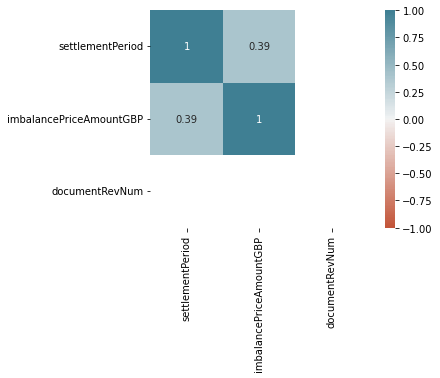

In [11]:
#settlement period vs imbalance price
correlation = df_B1770.corr(method='pearson')

ax = sns.heatmap(
    correlation, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

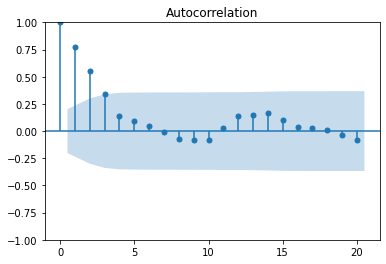

In [31]:
#prep data for forecasting
# df_B1770['day'] = df_B1770['local_datetime'].dt.day
# df_B1770['month'] = df_B1770['local_datetime'].dt.month
# df_B1770['year'] = df_B1770['local_datetime'].dt.year
# df_B1770['hour'] = df_B1770['local_datetime'].dt.hour
# df_B1770['minute'] = df_B1770['local_datetime'].dt.minute
# df_B1770.head(10)


from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_B1770['imbalancePriceAmountGBP'])
plt.show()

In [19]:
#training and testing data
df_B1770_training = df_B1770[(df_B1770['local_datetime'] > '2020-01-01 00:00:00') & (df_B1770['local_datetime'] <= '2020-01-01 11:30:00')]
df_B1770_testing = df_B1770[(df_B1770['local_datetime'] > '2020-01-01 12:00:00') & (df_B1770['local_datetime'] <= '2020-01-01 23:00:00')]

In [23]:
#pre/processing a


df_B1770_training.head()



,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,...,activeFlag,docStatus,documentID,documentRevNum,local_time,Year,Month,Day,Hour,Minute
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Excess balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0
5,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Excess balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0
6,2020-01-01 01:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,4,28.52000,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438318,1,01:30:00,2020,1,1,1,30


In [20]:
#pre-processing #lag variables for the dependent variable price
df_B1770_training['Lag_1'] = df_B1770_training['imbalancePriceAmountGBP'].shift(1)
df_B1770_testing['Lag_1'] = df_B1770_testing['imbalancePriceAmountGBP'].shift(1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\2428237418.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\2428237418.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
#cycical pre-processing for time.
df_B1770_training.head()

,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,...,docStatus,documentID,documentRevNum,local_time,Year,Month,Day,Hour,Minute,Lag_1
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30,NaN
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Excess balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30,51.00000
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0,51.00000
5,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Excess balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0,29.37006
6,2020-01-01 01:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,4,28.52000,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438318,1,01:30:00,2020,1,1,1,30,29.37006


In [38]:
#remove altenating rows in the dataframe if needed
# df_B1770_training = df_B1770_training.iloc[::2]
# df_B1770_testing =  df_B1770_testing.iloc[::2]

df_B1770_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 50 to 93
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype                        
---  ------                   --------------  -----                        
 0   local_datetime           44 non-null     datetime64[ns, Europe/London]
 1   timeSeriesID             44 non-null     object                       
 2   businessType             44 non-null     category                     
 3   controlArea              44 non-null     object                       
 4   settlementDate           44 non-null     object                       
 5   settlementPeriod         44 non-null     int32                        
 6   imbalancePriceAmountGBP  44 non-null     float64                      
 7   priceCategory            44 non-null     category                     
 8   curveType                44 non-null     category                     
 9   resolution               44 non-null     object        

In [21]:
#select the variables for testing and training

#do note select local_datetime,timeSeriesID, controlAra, #settlement Date, # documentID 
df_B1770_training = df_B1770_training[["businessType", "settlementPeriod","imbalancePriceAmountGBP","priceCategory","curveType","resolution", "documentType", "processType", "activeFlag","docStatus", 
"documentRevNum", "local_time", "Year", "Month", "Day","Hour", "Minute", "Lag_1"]]

df_B1770_testing = df_B1770_testing[["businessType", "settlementPeriod","imbalancePriceAmountGBP","priceCategory","curveType","resolution", "documentType", "processType", "activeFlag","docStatus", 
"documentRevNum", "local_time", "Year", "Month", "Day","Hour", "Minute", "Lag_1"]]



In [41]:
df_B1770_training

,businessType,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,documentType,processType,activeFlag,docStatus,documentRevNum,local_time,Year,Month,Day,Hour,Minute,Lag_1
2,Balance energy deviation,2,51.00000,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,00:30:00,2020,1,1,0,30,NaN
3,Balance energy deviation,2,51.00000,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,00:30:00,2020,1,1,0,30,51.00000
4,Balance energy deviation,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:00:00,2020,1,1,1,0,51.00000
5,Balance energy deviation,3,29.37006,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:00:00,2020,1,1,1,0,29.37006
6,Balance energy deviation,4,28.52000,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:30:00,2020,1,1,1,30,29.37006
7,Balance energy deviation,4,28.52000,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:30:00,2020,1,1,1,30,28.52000
8,Balance energy deviation,5,25.78000,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:00:00,2020,1,1,2,0,28.52000
9,Balance energy deviation,5,25.78000,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:00:00,2020,1,1,2,0,25.78000
10,Balance energy deviation,6,24.77018,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:30:00,2020,1,1,2,30,25.78000
11,Balance energy deviation,6,24.77018,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:30:00,2020,1,1,2,30,24.77018


In [22]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#prep data for basic linear regression forcasting test on all data no train test split
#make catvariables dummmy vaiables 
#statsmodels pacakage in pandas.

#might need to change all the categories to just an object or numberical value depending on type of column

df_imbalance_price_training = pd.get_dummies(df_B1770_training, columns=["businessType", "activeFlag","documentType","processType","docStatus","curveType","priceCategory" ], drop_first=True)
df_imbalance_price_testing = pd.get_dummies(df_B1770_testing, columns=["businessType", "activeFlag","documentType","processType","docStatus","curveType","priceCategory" ], drop_first=True)

In [23]:
X_Train =df_imbalance_price_training.drop(columns=['Lag_1'])
y_Train = df_imbalance_price_training[['Lag_1']]
X_Test =df_imbalance_price_testing.drop(columns=['Lag_1'])
y_test =df_imbalance_price_testing[['Lag_1']]

In [24]:
#for lag predictor gets rid of Nan Column.
X_Train.drop(index=df.index[2], 
        axis=0, 
        inplace=True)
X_Test.drop(index=df.index[50], 
        axis=0, 
        inplace=True)
y_Train.drop(index=df.index[2], 
        axis=0, 
        inplace=True)
y_test.drop(index=df.index[50], 
        axis=0, 
        inplace=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\1096143757.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\1096143757.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
X_Test

,settlementPeriod,imbalancePriceAmountGBP,resolution,documentRevNum,local_time,Year,Month,Day,Hour,Minute,priceCategory_Insufficient balance
51,26,51.90,PT30M,1,12:30:00,2020,1,1,12,30,0
52,27,51.00,PT30M,1,13:00:00,2020,1,1,13,0,1
53,27,51.00,PT30M,1,13:00:00,2020,1,1,13,0,0
54,28,51.00,PT30M,1,13:30:00,2020,1,1,13,30,1
55,28,51.00,PT30M,1,13:30:00,2020,1,1,13,30,0
56,29,50.75,PT30M,1,14:00:00,2020,1,1,14,0,1
57,29,50.75,PT30M,1,14:00:00,2020,1,1,14,0,0
58,30,7.50,PT30M,1,14:30:00,2020,1,1,14,30,1
59,30,7.50,PT30M,1,14:30:00,2020,1,1,14,30,0
60,31,7.50,PT30M,1,15:00:00,2020,1,1,15,0,1


In [28]:
#run linear regression and plot prediction vs actual values 
#training
X_Train =X_Train.drop(columns=['local_time', 'resolution',])
X_Test =X_Test.drop(columns=['local_time', 'resolution'])
#model = sm.OLS(y_Train, X_Train).fit()

X_Train.head()

,settlementPeriod,imbalancePriceAmountGBP,documentRevNum,Year,Month,Day,Hour,Minute,priceCategory_Insufficient balance
3,2,51.00000,1,2020,1,1,0,30,0
4,3,29.37006,1,2020,1,1,1,0,1
5,3,29.37006,1,2020,1,1,1,0,0
6,4,28.52000,1,2020,1,1,1,30,1
7,4,28.52000,1,2020,1,1,1,30,0


In [29]:
model = sm.OLS(y_Train, X_Train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lag_1   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     20.77
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.51e-09
Time:                        11:53:48   Log-Likelihood:                -162.65
No. Observations:                  45   AIC:                             335.3
Df Residuals:                      40   BIC:                             344.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
settlementPeriod                       0.1375      0.178      0.770      0.446      -0.223       0.498
imbalancePriceAmountGBP                0.7886      0.090      8.749      0.000       0.606       0.971
documentRevNum                      1.608e-06   1.09e-06      1.471      0.149   -6.01e-07    3.82e-06
Year                                   0.0032      0.002      1.471      0.149      -0.001       0.008
Month                               1.608e-06   1.09e-06      1.471      0.149   -6.01e-07    3.82e-06
Day                                 1.608e-06   1.09e-06      1.471      0.149   -6.01e-07    3.82e-06
Hour                                   0.0703      0.089      0.788      0.436      -0.110       0.251
Minute                                -0.0927      0.095     -0.976      0.335      -0.284       0.099
priceCategory_Insufficient balance     1.6715      2.846      0.587      0.560      -4.081       7.424
==============================================================================
Omnibus:                        9.284   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               12.344
Skew:                          -0.586   Prob(JB):                      0.00209
Kurtosis:                       5.283   Cond. No.                     1.25e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
#predictions and plot predicted vs actual
predictions = model.predict(X_Test) 

In [78]:
predictions
predictions_df = pd.DataFrame(predictions)


In [97]:
#plot #predictions against each other 
plot_forcasts = pd.concat([df_imbalance_price_testing, predictions], axis=1, ignore_index=True)

plot_forcasts

plot_forecasts = plot_forcasts.rename(columns={4: 'date_Time', 1: 'acutal', 12: 'predited'}, inplace=True)

In [104]:
import plotly.graph_objects as go

import plotly.express as px

#df = px.data.stocks()

fig5 = px.line(plot_forcasts,x='date_Time', y='predited')
fig6 = px.line(plot_forcasts, x='date_Time', y='acutal')
fig5.show()
fig6.show()

In [102]:
plot_forcasts.head()

,0,acutal,2,3,date_Time,5,6,7,8,9,10,11,predited
50,26,51.9,PT30M,1,12:30:00,2020,1,1,12,30,NaN,1,40.353812
51,26,51.9,PT30M,1,12:30:00,2020,1,1,12,30,51.9,0,40.353812
52,27,51.0,PT30M,1,13:00:00,2020,1,1,13,0,51.9,1,38.091145
53,27,51.0,PT30M,1,13:00:00,2020,1,1,13,0,51.0,0,38.091145
54,28,51.0,PT30M,1,13:30:00,2020,1,1,13,30,51.0,1,41.056831


,settlementPeriod,documentRevNum,Year,Month,Day,Hour,Minute,priceCategory_Insufficient balance
2,2,1,2020,1,1,0,30,1
3,2,1,2020,1,1,0,30,0
4,3,1,2020,1,1,1,0,1
5,3,1,2020,1,1,1,0,0
6,4,1,2020,1,1,1,30,1
7,4,1,2020,1,1,1,30,0
8,5,1,2020,1,1,2,0,1
9,5,1,2020,1,1,2,0,0
10,6,1,2020,1,1,2,30,1
11,6,1,2020,1,1,2,30,0


In [130]:
#use lag variables 

X_Train =X_Train.drop(columns=['local_time', 'resolution','imbalancePriceAmountGBP'])
X_Test =X_Test.drop(columns=['local_time', 'resolution','imbalancePriceAmountGBP'])
#model = sm.OLS(y_Train, X_Train).fit()



In [119]:
#y_Train.dropna()
#X_Train
#X_Test
y_tra

,Lag_1
2,NaN
3,51.00000
4,51.00000
5,29.37006
6,29.37006
7,28.52000
8,28.52000
9,25.78000
10,25.78000
11,24.77018


In [131]:
model_lag = sm.OLS(y_Train, X_Train).fit()
model_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lag_1   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7643
Date:                Mon, 16 May 2022   Prob (F-statistic):              0.521
Time:                        18:23:47   Log-Likelihood:                -186.72
No. Observations:                  45   AIC:                             381.4
Df Residuals:                      41   BIC:                             388.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
settlementPeriod                       0.4341      0.295      1.470      0.149      -0.162       1.030
documentRevNum                      6.948e-06   1.53e-06      4.544      0.000    3.86e-06       1e-05
Year                                   0.0140      0.003      4.544      0.000       0.008       0.020
Month                               6.948e-06   1.53e-06      4.544      0.000    3.86e-06       1e-05
Day                                 6.948e-06   1.53e-06      4.544      0.000    3.86e-06       1e-05
Hour                                   0.2178      0.148      1.475      0.148      -0.081       0.516
Minute                                -0.0453      0.160     -0.284      0.778      -0.368       0.277
priceCategory_Insufficient balance     0.9254      4.797      0.193      0.848      -8.762      10.612
==============================================================================
Omnibus:                        4.108   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.700
Skew:                          -0.416   Prob(JB):                        0.259
Kurtosis:                       2.135   Cond. No.                     1.87e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
#CrossBorder Balancing Volumes of Exchanged Bids and Offers
df_B1810 = client.get_B1810(start_date, end_date)
df_B1810.head(3)

B1810:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\utils.py:29: UserWarning: Data request was succesful but no content was returned
  warn(f'Data request was succesful but no content was returned')
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_SP)
B1810:  33%|███▎      | 1/3 [00:00<00:01,  1.58it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\utils.py:29: UserWarning: Data request was succesful but no content was returned
  warn(f'Data request was succesful but no content was returned')
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

""


In [ ]:
#to improve model output:

#look into Lasso Regularisation
#k fold cross validation
#working on seasonality of the data
#since adn cosine transformationof the time tdata
#Long-term short term=-seosnalit

In [ ]:
#set time to read on time series literature(go back to data and feature engineering then)

In [19]:
#numerical varaibles 
#stettlementPeriod
#imbalancePriceAmountGBP
#documentRevNum

#categorical
#priceCategory
#curveType
#processType
#activeFlag
#documentType
#processType
#activeFlag

df_B1810.head(3)

NameError: name 'df_B1810' is not defined

In [31]:
#Day-ahead Aggregated Generation
df_B1430 = client.get_B1430(start_date, end_date)
df_B1430.head(3)

B1430:   0%|          | 0/3 [00:00<?, ?it/s]


ValueError: The returned `data_content` must be one of: `list` or `OrderedDict`

In [20]:
# Imbalance Prices
response_imbalance_prices = requests.get("""https://api.bmreports.com/BMRS/B1770/v1?APIKey=52g2ac5kwwh5chc&SettlementDate=<SettlementDate>&
Period=<Period>&ServiceType=<xml/csv>""")

print(response_imbalance_prices)

<Response [200]>


In [14]:
#CrossBorder Balancing Volumes of Exchanged Bids and Offers
response_crossborder_balancing_volumes = requests.get("""https://api.bmreports.com/BMRS/B1810/<VersionNo>?APIKey=52g2ac5kwwh5chc&SettlementDate=<2014-12-31
>&Period=<1>&ServiceType=<xml/csv>""")


print(response_crossborder_balancing_volumes)



<Response [200]>


In [ ]:
#plot the graph as it is
#run simple linear regression with price and day (before develing into the data)
#check for correltion and autocorrelation
#checkforpercentage change.
#https://github.com/matteobonanomi/dsnd-capstone/blob/master/notebook/LSTM.ipynb
#https://towardsdatascience.com/pytorch-lstms-for-time-series-data-cd16190929d7